# Deep Learning | MLPs for Non-Linear Data Classification

### Dataset: Two Circles | Framework: Keras (Tensorflow)

## 🔹 1. Setup & Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam

2025-04-28 20:03:30.485670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745852610.501154   45067 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745852610.505681   45067 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 20:03:30.520072: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


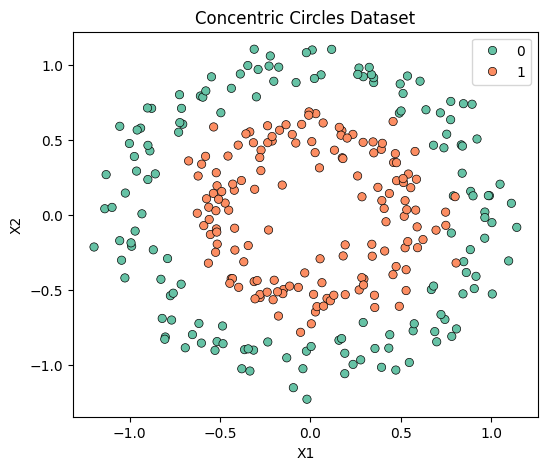

In [2]:
# Generate concentric circles
X, y = make_circles(n_samples=300, noise=0.1, factor=0.55, random_state=42)

# Visualize raw data
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set2", edgecolor='k')
plt.title("Concentric Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### ✅ Preprocess (Standardize and Split)

In [3]:
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

## 🔹 2. Linear Model (No Hidden Layer)

In [4]:
# Linear model: just input → output
linear_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(1, activation='sigmoid')
])

linear_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
linear_model.summary()

I0000 00:00:1745852623.103910   45067 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4699 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### ✅ Model Training

In [5]:
# Train model
history_linear = linear_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=1
)

Epoch 1/100


I0000 00:00:1745852675.436471   45166 service.cc:148] XLA service 0x7fe79c004d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745852675.437642   45166 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2025-04-28 20:04:35.488263: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745852675.595068   45166 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 857ms/step - accuracy: 0.4062 - loss: 0.7216

I0000 00:00:1745852675.900632   45166 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4588 - loss: 0.7055 - val_accuracy: 0.6667 - val_loss: 0.6707
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4524 - loss: 0.7041 - val_accuracy: 0.6458 - val_loss: 0.6741
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4928 - loss: 0.6894 - val_accuracy: 0.6250 - val_loss: 0.6764
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4690 - loss: 0.6941 - val_accuracy: 0.6042 - val_loss: 0.6796
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4766 - loss: 0.6977 - val_accuracy: 0.5833 - val_loss: 0.6830
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5212 - loss: 0.6931 - val_accuracy: 0.5833 - val_loss: 0.6860
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5496 - loss: 0.6885 - val_accuracy: 0.5417 - val_loss: 0.6871
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4918 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoc

### ✅ Model Evaluation

In [6]:
# Predict and evaluate
y_pred_linear = (linear_model.predict(X_test) > 0.5).astype("int32")
print("Linear Model Accuracy:", accuracy_score(y_test, y_pred_linear))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 
Linear Model Accuracy: 0.5


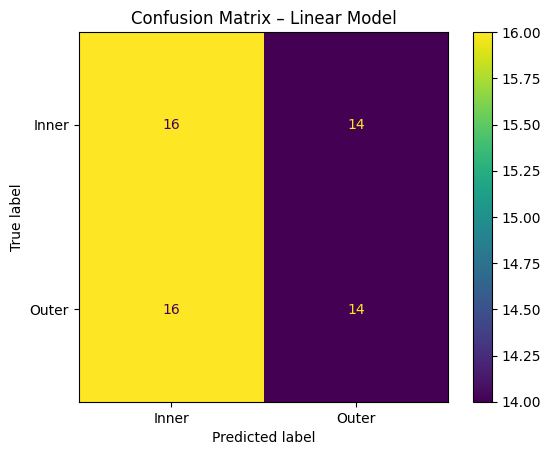

In [7]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linear), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – Linear Model")
plt.show()

### ✅ Visualize Decision Boundary

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


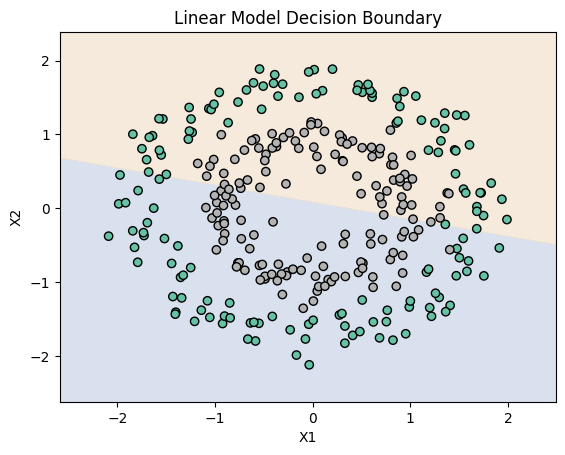

In [8]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='Pastel2', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set2')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(linear_model, X_scaled, y, "Linear Model Decision Boundary")


## 🔹 3. MLP with ReLU (Hidden Layers)

In [11]:
mlp_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

mlp_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

### ✅ Model Training

In [12]:
history_mlp = mlp_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4156 - loss: 0.7381 - val_accuracy: 0.5000 - val_loss: 0.6765
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4881 - loss: 0.7016 - val_accuracy: 0.5833 - val_loss: 0.6630
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5155 - loss: 0.6876 - val_accuracy: 0.5625 - val_loss: 0.6534
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5092 - loss: 0.6823 - val_accuracy: 0.5833 - val_loss: 0.6445
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5257 - loss: 0.6753 - val_accuracy: 0.5833 - val_loss: 0.6363
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5048 - loss: 0.6725 - val_accuracy: 0.6042 - val_loss: 0.6276
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5891 - loss: 0.6447 - val_accuracy: 0.6250 - val_loss: 0.6141
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5924 - loss: 0.6415 - val_accuracy: 0.6667 - val_loss:

### ✅ Evaluate + Compare Performance

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
MLP Accuracy: 1.0


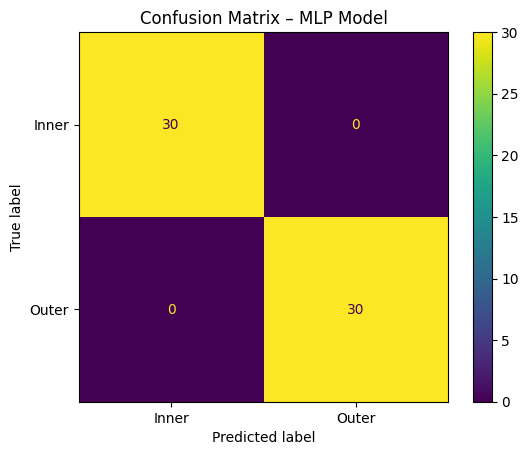

In [13]:
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – MLP Model")
plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


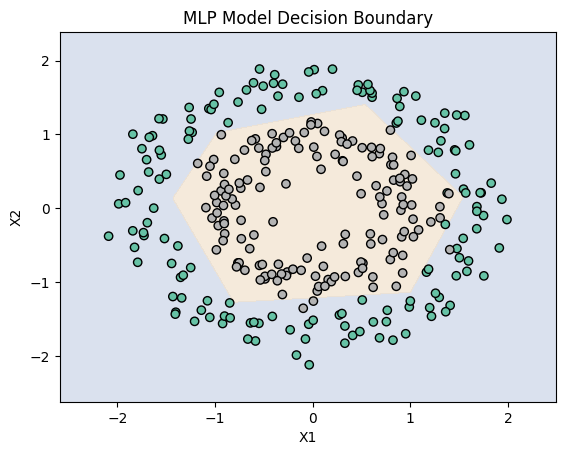

In [14]:
plot_decision_boundary(mlp_model, X_scaled, y, "MLP Model Decision Boundary")

### ✅ Visualize Accuracy & Loss Curves

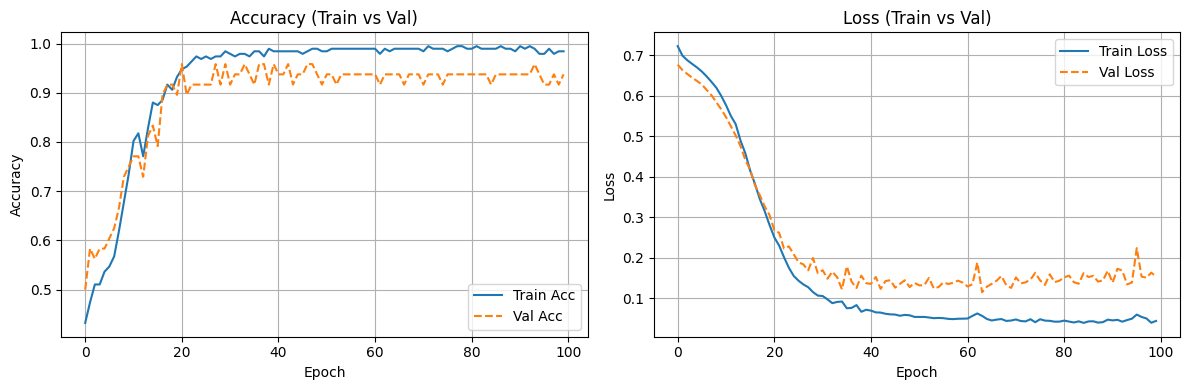

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
axs[0].plot(history_mlp.history['accuracy'], label='Train Acc')
axs[0].plot(history_mlp.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title("Accuracy (Train vs Val)")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid(True)

# Loss
axs[1].plot(history_mlp.history['loss'], label='Train Loss')
axs[1].plot(history_mlp.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title("Loss (Train vs Val)")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 🔹 4. Hidden Layers Without Activation (Still Linear!)

In [16]:
# Model with 2 hidden layers but no activation functions
linear_hidden_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(8, input_shape=(2,), activation=None),
    Dense(8, activation=None),
    Dense(1, activation='sigmoid')
])

linear_hidden_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

linear_hidden_model.summary()

/home/ai/miniconda3/envs/dl/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

### ✅ Model Training

In [17]:
history_lin_hidden = linear_hidden_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

### ✅ Model Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Accuracy (No Activation Hidden Layers): 0.48333333333333334


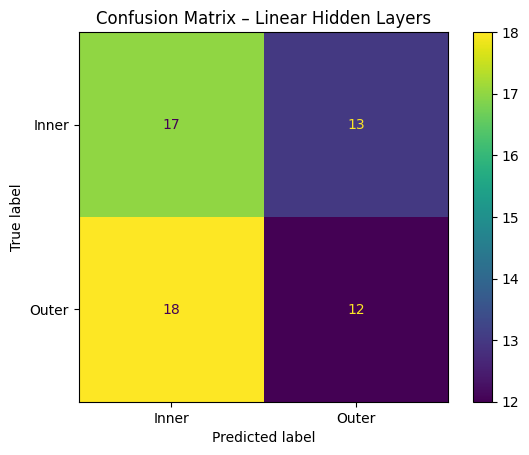

In [18]:
# Evaluation
y_pred_lin_hidden = (linear_hidden_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy (No Activation Hidden Layers):", accuracy_score(y_test, y_pred_lin_hidden))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lin_hidden), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – Linear Hidden Layers")
plt.show()

### ✅ Visualize Decision Boundary

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


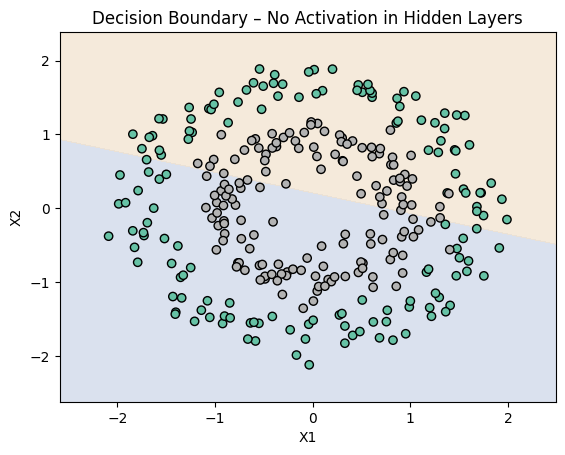

In [19]:
# Decision boundary
plot_decision_boundary(linear_hidden_model, X_scaled, y, "Decision Boundary – No Activation in Hidden Layers")

## 🔹 5. Deeper MLP = More Capacity

In [20]:
# Deeper model
deep_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

deep_model.summary()

/home/ai/miniconda3/envs/dl/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

### ✅ Model Training

In [21]:
history_deep = deep_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

### ✅ Model Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Accuracy (Deeper MLP): 0.9833333333333333


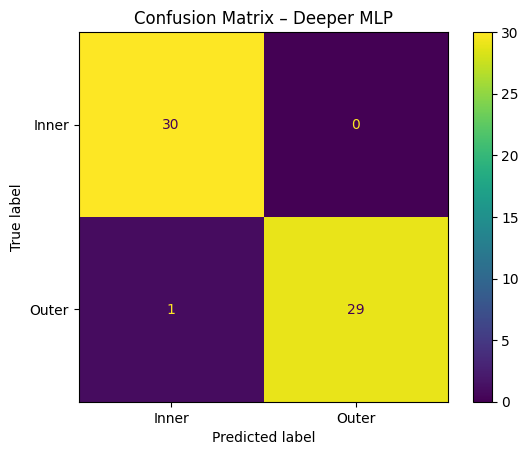

In [22]:
# Evaluation
y_pred_deep = (deep_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy (Deeper MLP):", accuracy_score(y_test, y_pred_deep))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_deep), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – Deeper MLP")
plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 990us/step


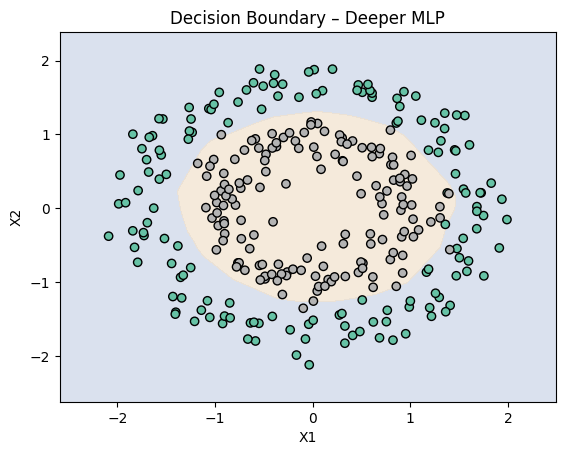

In [23]:
plot_decision_boundary(deep_model, X_scaled, y, "Decision Boundary – Deeper MLP")